In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

Generate Non-Linear Data

In [10]:
# Non-linear separable data
X, y = make_circles(
    n_samples=1000,
    noise=0.03,
    random_state=42
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Create Model

In [11]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Binary output
])


Compile Model

In [12]:

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)


Train Model

In [13]:

history = model.fit(
    X_train,
    y_train,
    epochs=25,
    verbose=0
)


Evaluate Model

In [14]:

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")


Test accuracy: 1.000


Visualize Decision Boundary

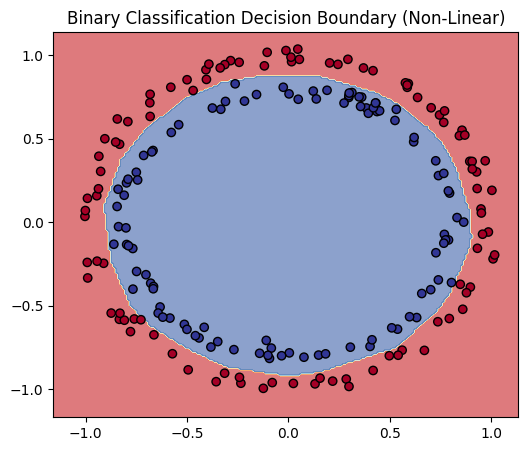

In [15]:
# Create mesh grid
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 200),
    np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 200)
)

# Predict on grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 5))

plt.contourf(
    xx, yy,
    (probs > 0.5).astype(int),
    cmap=plt.cm.RdYlBu,
    alpha=0.6
)

plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=plt.cm.RdYlBu,
    edgecolor="k"
)

plt.title("Binary Classification Decision Boundary (Non-Linear)")
plt.show()
